In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('data/datasets/3410013301.csv', dtype={'STATUS': object, 'TERMINATED': object})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129016 entries, 0 to 129015
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   REF_DATE           129016 non-null  int64  
 1   GEO                129016 non-null  object 
 2   DGUID              128132 non-null  object 
 3   Type of structure  129016 non-null  object 
 4   Type of unit       129016 non-null  object 
 5   UOM                129016 non-null  object 
 6   UOM_ID             129016 non-null  int64  
 7   SCALAR_FACTOR      129016 non-null  object 
 8   SCALAR_ID          129016 non-null  int64  
 9   VECTOR             129016 non-null  object 
 10  COORDINATE         129016 non-null  object 
 11  VALUE              70924 non-null   float64
 12  STATUS             58092 non-null   object 
 13  SYMBOL             0 non-null       float64
 14  TERMINATED         2552 non-null    object 
 15  DECIMALS           129016 non-null  int64  
dtypes:

In [24]:
df.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,DECIMALS
count,129016.000000,129016.0,129016.0,70924.000000,0.0,129016.0
mean,2005.339555,81.0,0.0,666.695801,NaN,0.0
std,10.947887,0.0,0.0,314.022695,NaN,0.0
min,1987.000000,81.0,0.0,0.000000,NaN,0.0
25%,1996.000000,81.0,0.0,456.000000,NaN,0.0
50%,2005.000000,81.0,0.0,604.000000,NaN,0.0
75%,2015.000000,81.0,0.0,814.000000,NaN,0.0
max,2024.000000,81.0,0.0,2961.000000,NaN,0.0


In [26]:
## Count null values in each column
df.isnull().sum()

REF_DATE                  0
GEO                       0
DGUID                   884
Type of structure         0
Type of unit              0
UOM                       0
UOM_ID                    0
SCALAR_FACTOR             0
SCALAR_ID                 0
VECTOR                    0
COORDINATE                0
VALUE                 58092
STATUS                70924
SYMBOL               129016
TERMINATED           126464
DECIMALS                  0
dtype: int64

In [27]:
## Count of unique values
df.nunique()

REF_DATE               38
GEO                   244
DGUID                 234
Type of structure       4
Type of unit            4
UOM                     1
UOM_ID                  1
SCALAR_FACTOR           1
SCALAR_ID               1
VECTOR               3640
COORDINATE           3640
VALUE                1882
STATUS                  2
SYMBOL                  0
TERMINATED              1
DECIMALS                1
dtype: int64

In [28]:
## Filter to only 2020 to 2025 data
df = df[(df['REF_DATE'] >= 2020) & (df['REF_DATE'] <= 2025)]

## Drop rows where VALUE is NaN
df = df.dropna(subset=["VALUE"])

print(df.shape)
df = df[df['STATUS'] != 'F']
print(df.shape)
## Drop columns that are not needed
df = df.drop(columns=["DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "STATUS", "COORDINATE", "SYMBOL", "TERMINATED", "DECIMALS"])

## Filter to only include Ontario geography
df = df[df['GEO'].str.contains("Ontario", case=False)]

## Drop duplicate rows
df = df.drop_duplicates()

df

(10804, 16)
(10804, 16)


,REF_DATE,GEO,Type of structure,Type of unit,VALUE
112904,2020,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,Bachelor units,631.0
112905,2020,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,One bedroom units,791.0
112906,2020,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,Two bedroom units,949.0
112907,2020,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row and apartment structures of three units an...,Three bedroom units,1036.0
112910,2020,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",Row structures of three units and over,Two bedroom units,754.0
...,...,...,...,...,...
127890,2024,"Woodstock, Ontario",Apartment structures of three units and over,Two bedroom units,1577.0
127891,2024,"Woodstock, Ontario",Apartment structures of three units and over,Three bedroom units,1758.0
127893,2024,"Woodstock, Ontario",Apartment structures of six units and over,One bedroom units,1425.0
127894,2024,"Woodstock, Ontario",Apartment structures of six units and over,Two bedroom units,1608.0


In [29]:
df_city = (
    df.groupby("GEO")["VALUE"]      # group by city
      .mean()                       # take mean VALUE
      .reset_index()                # make GEO a column again
      .sort_values(by="VALUE", ascending=False)  # sort by VALUE
)
df_city['VALUE'] = df_city['VALUE'].round(3)
df_city['GEO'] = df_city['GEO'].str.split(',').str[0]

df_city

,GEO,VALUE
61,Toronto,1706.419
49,Port Hope,1554.571
42,Ottawa-Gatineau,1510.632
41,Oshawa,1475.864
28,Kingston,1452.651
...,...,...
31,Leamington,519.356
13,Essex,108.054
57,Temiskaming Shores,0.000
35,Mississippi Mills,0.000


In [30]:
df_year = (
    df.groupby("REF_DATE")["VALUE"]  # group by year
      .mean()                        # take mean VALUE
      .reset_index()                 # make REF_DATE a column again
      .sort_values(by="VALUE", ascending=False)  # sort by VALUE
)
df_year['VALUE'] = df_year['VALUE'].round(3)

df_year

,REF_DATE,VALUE
4,2024,1161.687
3,2023,1111.892
2,2022,1082.281
1,2021,1018.377
0,2020,963.134


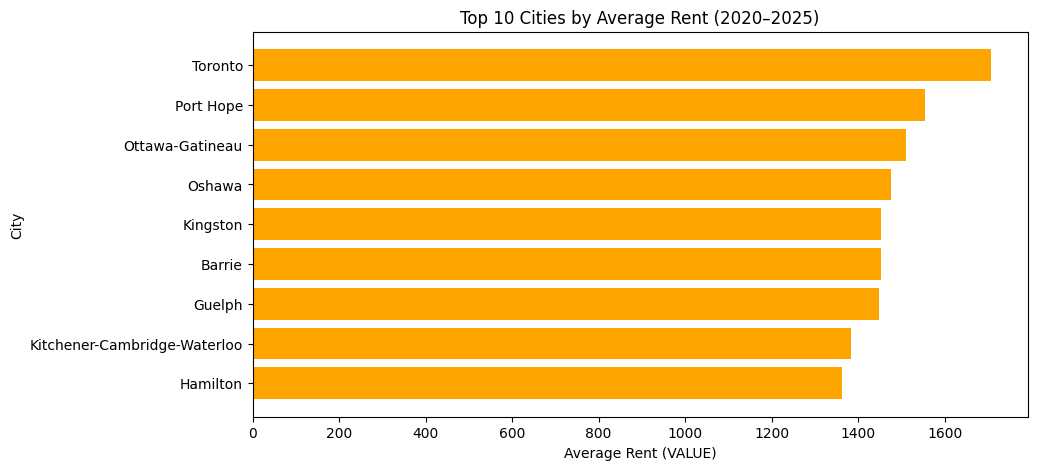

In [31]:
top_cities = df_city.head(10)  # take top 10
plt.figure(figsize=(10, 5))
plt.barh(top_cities["GEO"], top_cities["VALUE"], color="orange")
plt.xlabel("Average Rent (VALUE)")
plt.ylabel("City")
plt.title("Top 10 Cities by Average Rent (2020–2025)")
plt.gca().invert_yaxis()  # highest at top
plt.show()

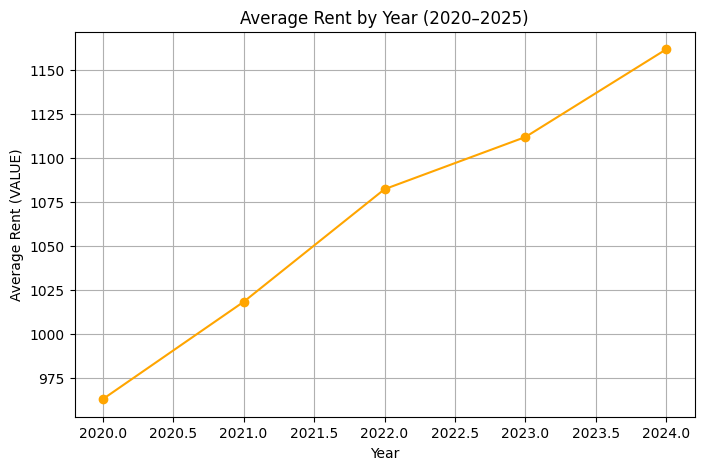

In [32]:
# ✅ Plot 2: Average Rent by Year
plt.figure(figsize=(8, 5))
plt.plot(df_year["REF_DATE"], df_year["VALUE"], marker="o", color="orange")
plt.xlabel("Year")
plt.ylabel("Average Rent (VALUE)")
plt.title("Average Rent by Year (2020–2025)")
plt.grid(True)
plt.show()

In [33]:
## Rename columns
df = df.rename(columns={
    "REF_DATE": "Year",
    "GEO": "City",
    "VALUE": "Rent Price"
})
df['City'] = df['City'].str.split(',').str[0]

df

,Year,City,Type of structure,Type of unit,Rent Price
112904,2020,Ottawa-Gatineau,Row and apartment structures of three units an...,Bachelor units,631.0
112905,2020,Ottawa-Gatineau,Row and apartment structures of three units an...,One bedroom units,791.0
112906,2020,Ottawa-Gatineau,Row and apartment structures of three units an...,Two bedroom units,949.0
112907,2020,Ottawa-Gatineau,Row and apartment structures of three units an...,Three bedroom units,1036.0
112910,2020,Ottawa-Gatineau,Row structures of three units and over,Two bedroom units,754.0
...,...,...,...,...,...
127890,2024,Woodstock,Apartment structures of three units and over,Two bedroom units,1577.0
127891,2024,Woodstock,Apartment structures of three units and over,Three bedroom units,1758.0
127893,2024,Woodstock,Apartment structures of six units and over,One bedroom units,1425.0
127894,2024,Woodstock,Apartment structures of six units and over,Two bedroom units,1608.0


In [34]:
## Save cleaned dataset
df.to_csv('data/cleaned_datasets/cleaned_3410013301.csv')